# Import Data & Subsetting

In [334]:
import os
import pandas as pd
import numpy as np

data = np.loadtxt("C:/Users/aceme/OneDrive/Documents/GitHub/BP24/Data Creation/Gaussian - small distance/gaussian_small_d_1.tex")

# Creating NumPy array
array = np.array(data)

# Converting to Pandas DataFrame
df = pd.DataFrame(array)

# Look at data
df.head()


,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,5.932947,6.786094,6.611294,4.475147,6.486705,6.091143,5.948467,5.840449,4.442511,4.494178,...,6.137426,2.839904,5.802785,4.080386,4.411744,3.881008,4.633491,3.973615,5.961780,1.0
1,8.297981,9.263485,10.827137,9.044824,9.167449,8.639441,9.764159,8.273140,9.657385,10.416822,...,8.196232,10.197469,8.193319,8.773931,8.896456,7.737510,7.654125,8.829240,9.621520,0.0
2,4.440450,5.327715,5.944927,6.143522,4.760937,3.946593,4.529549,3.361078,4.393441,5.293721,...,4.417696,4.480391,5.416208,5.533536,4.732919,4.834715,6.747958,6.756940,6.515869,1.0
3,4.354747,5.353276,5.162299,4.249466,3.095283,4.934333,4.580175,3.936969,5.959204,4.878784,...,4.437171,4.095338,5.526112,4.051550,7.120506,4.075997,3.384468,4.238665,4.321148,1.0
4,4.765622,5.641777,4.652296,4.702329,6.093533,4.713297,5.656604,2.703174,2.644621,4.727289,...,4.749562,4.383993,5.503089,5.680233,4.142355,3.837929,5.481257,5.643750,6.038575,1.0


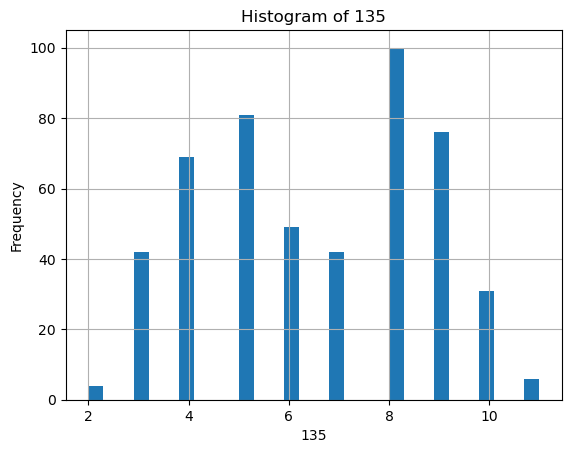

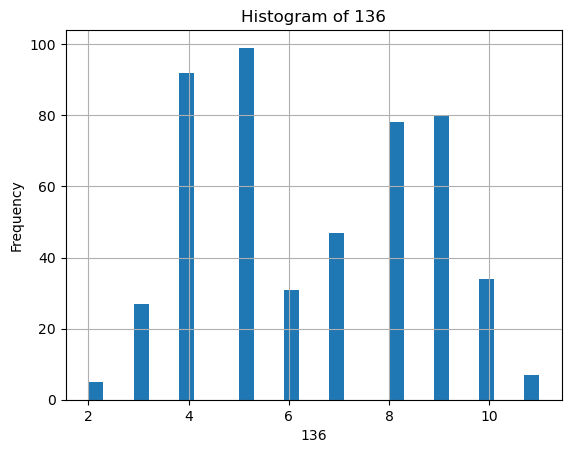

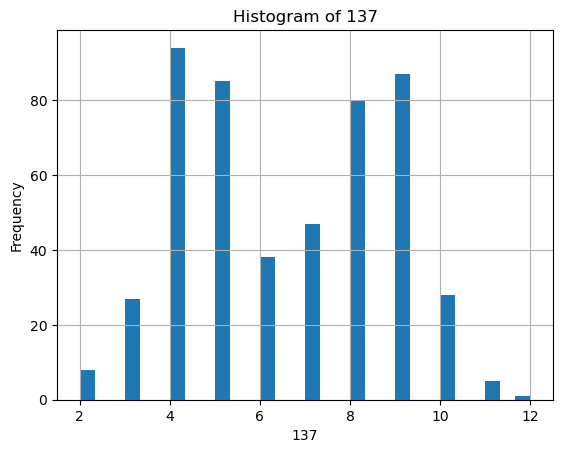

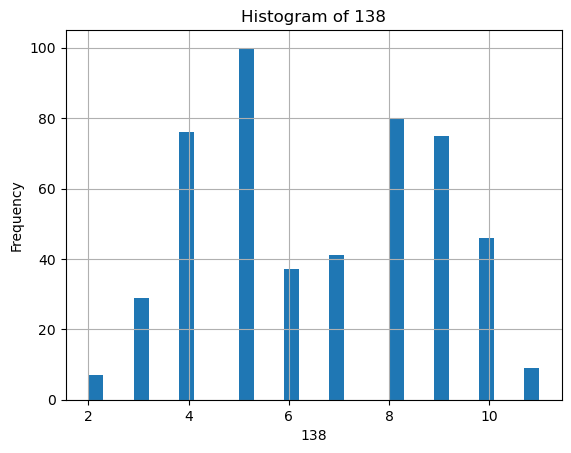

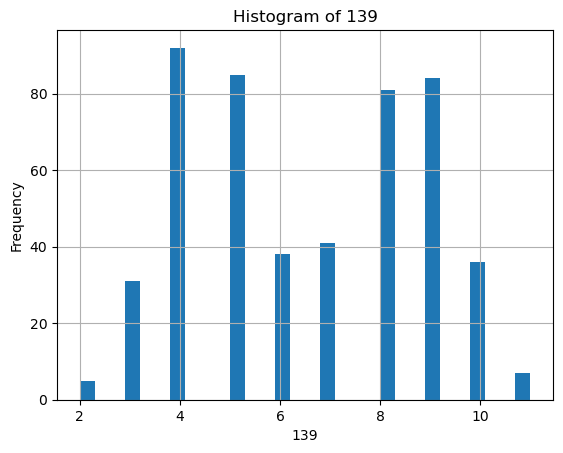

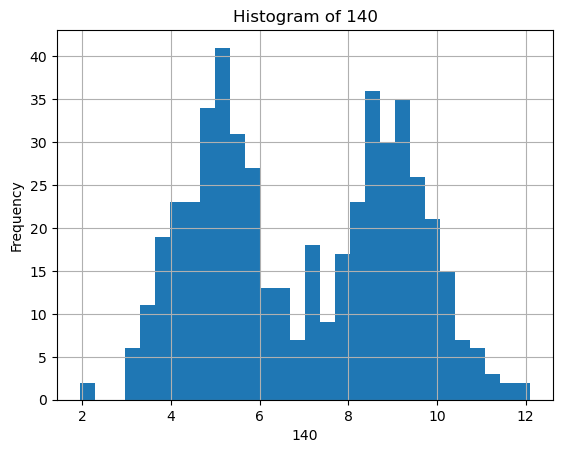

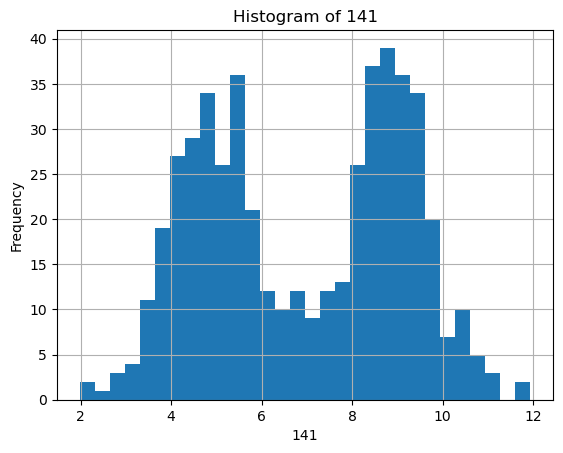

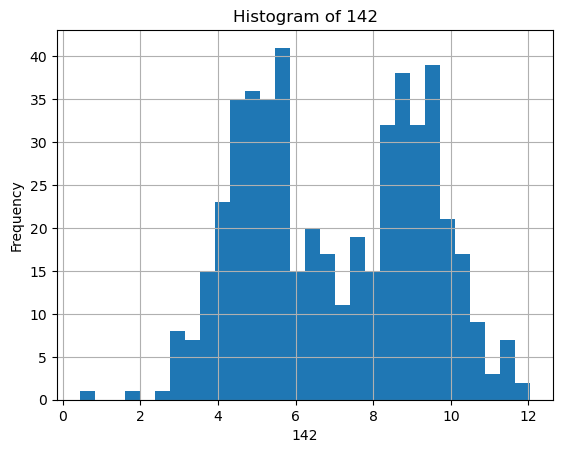

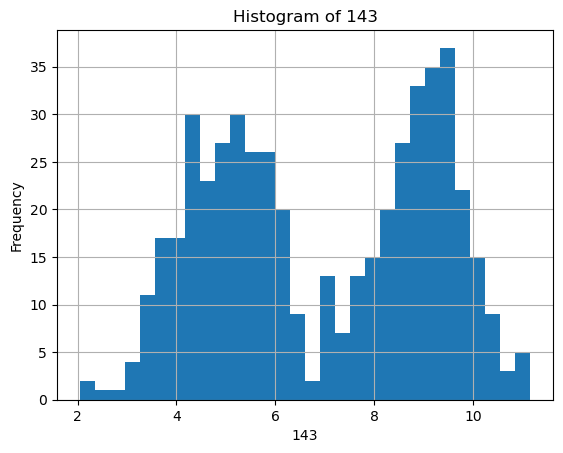

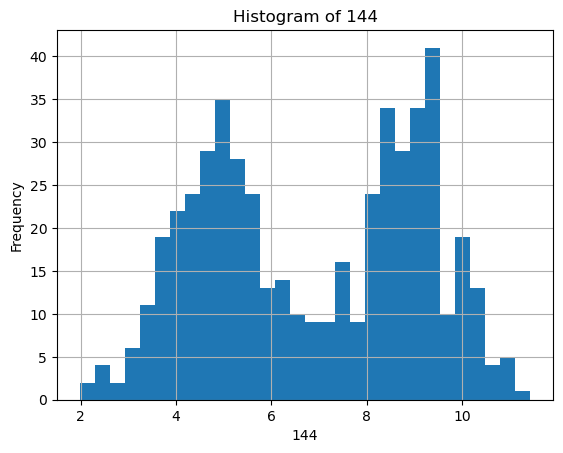

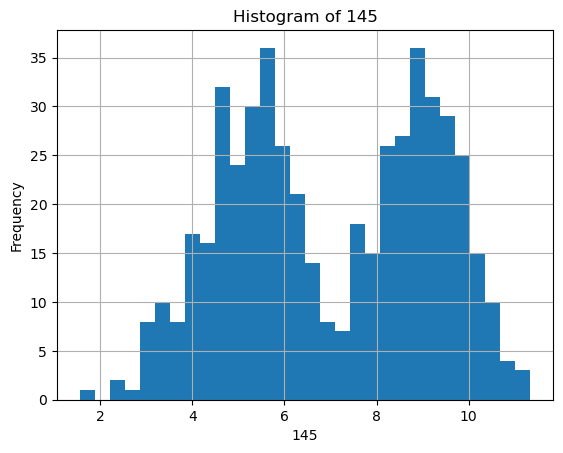

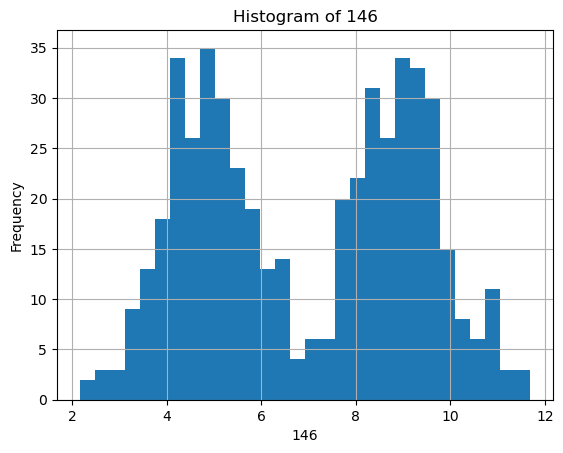

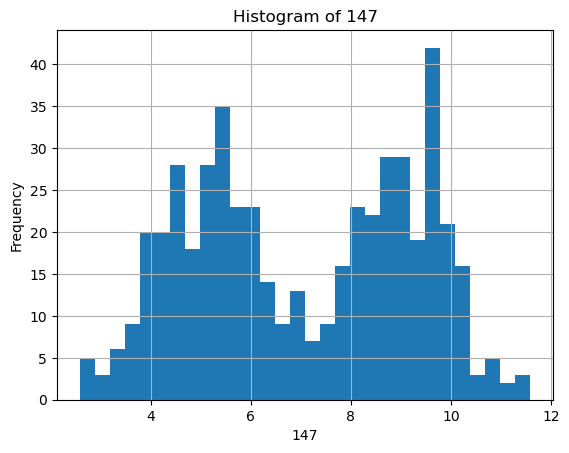

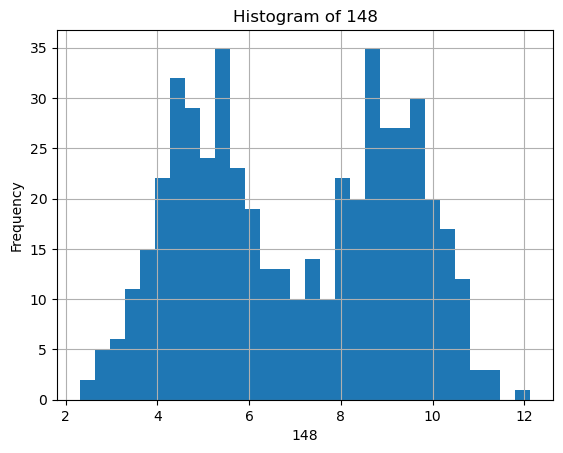

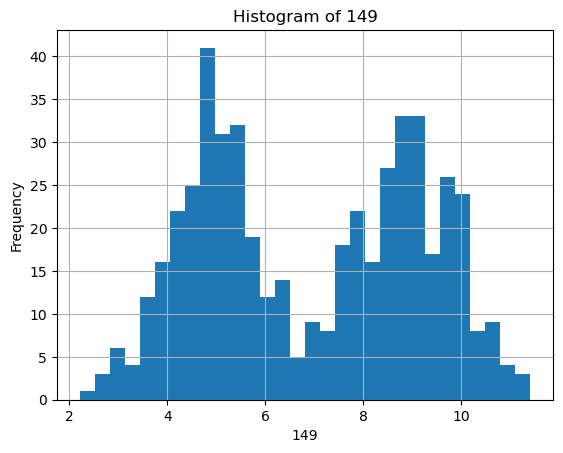

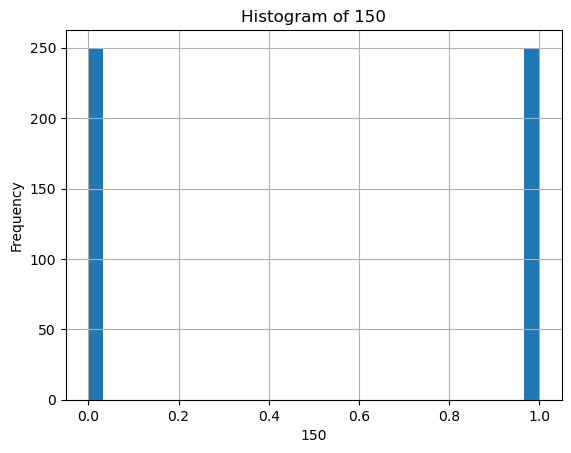

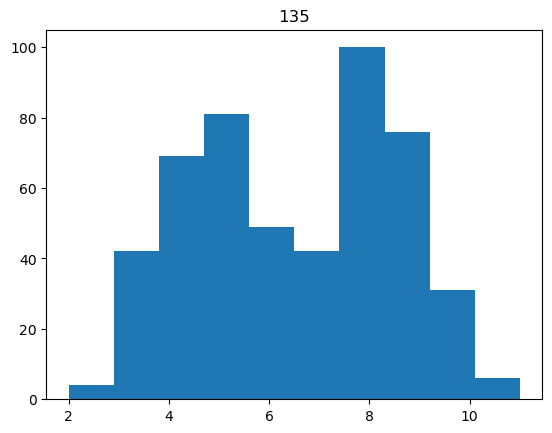

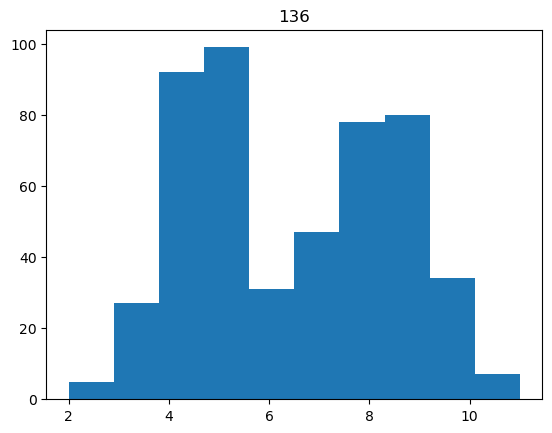

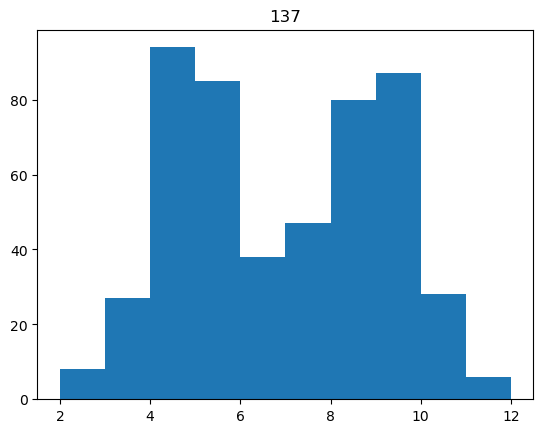

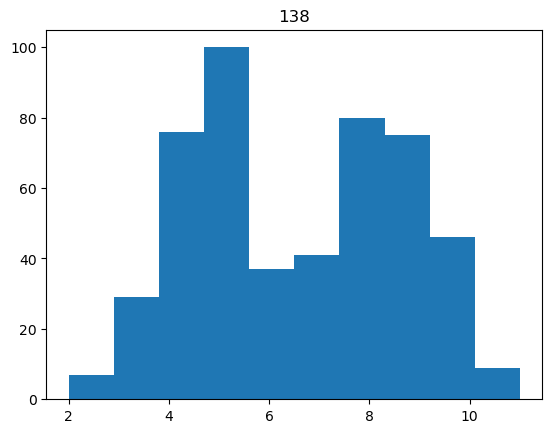

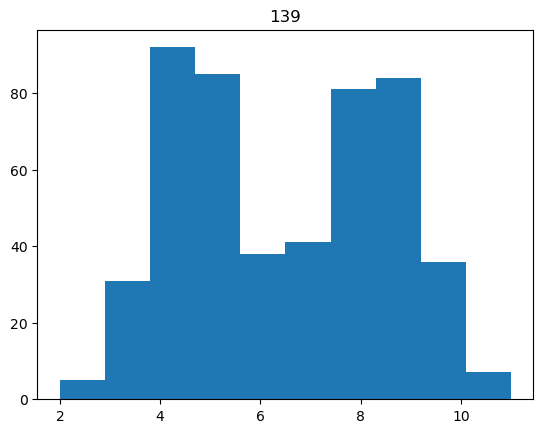

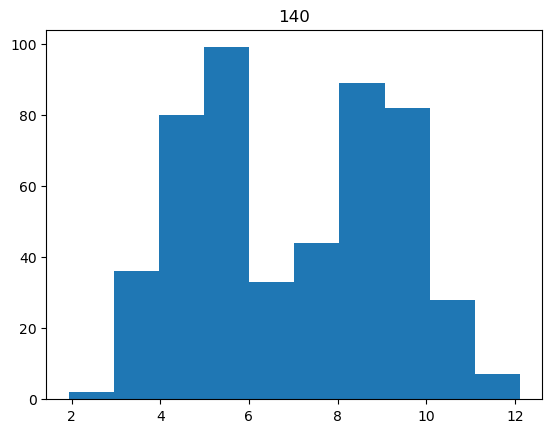

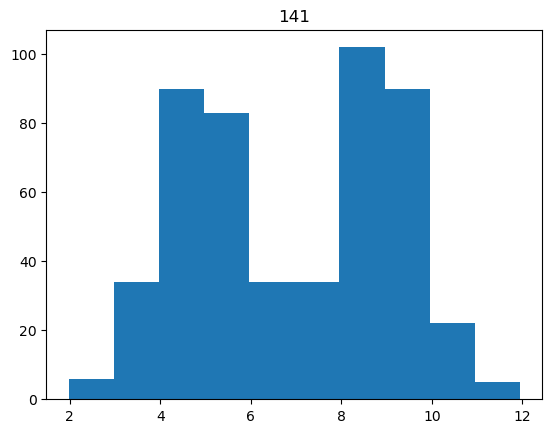

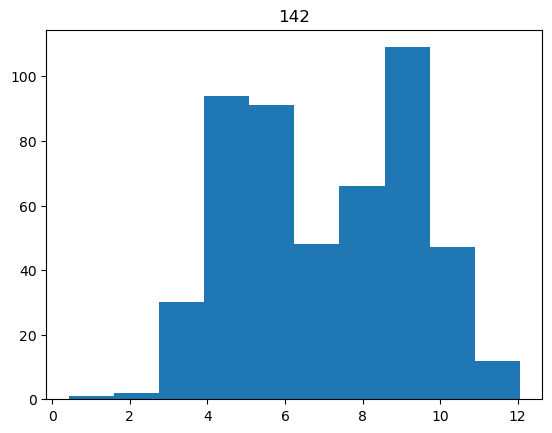

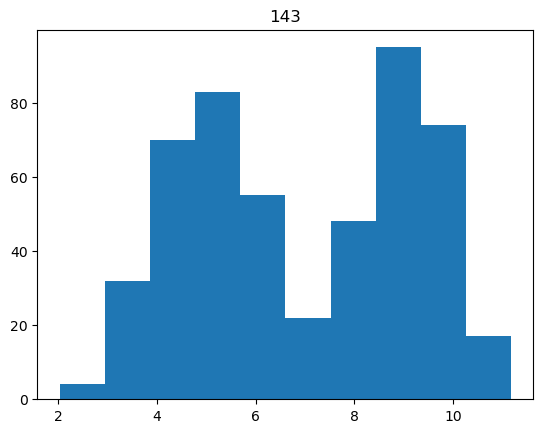

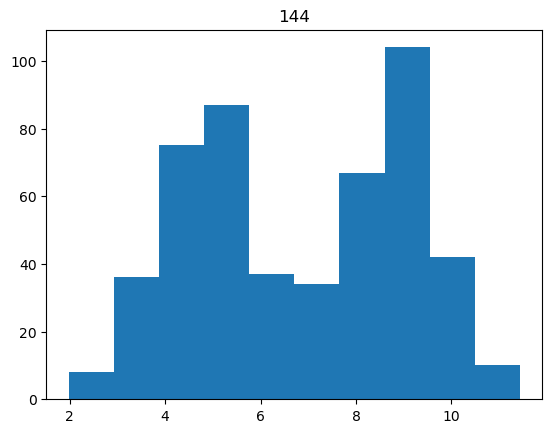

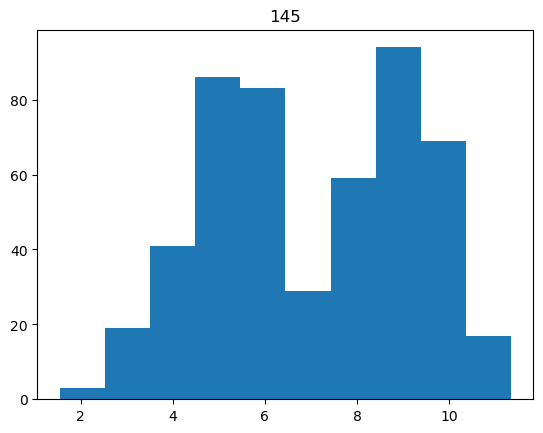

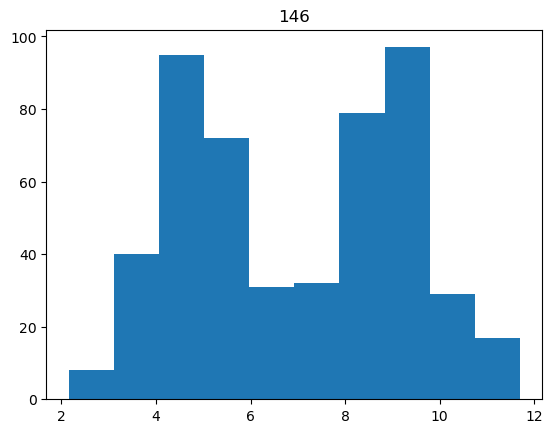

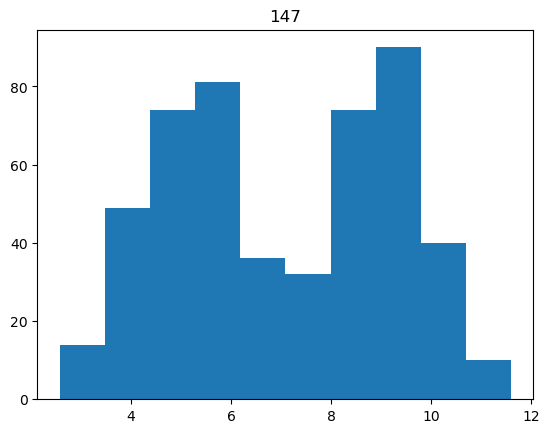

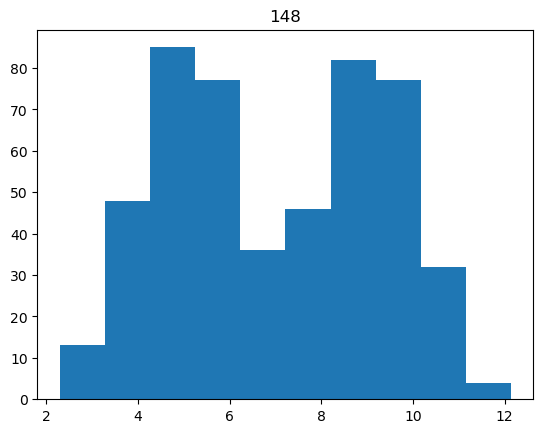

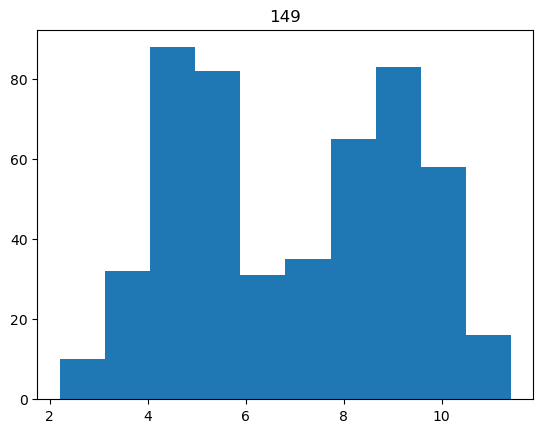

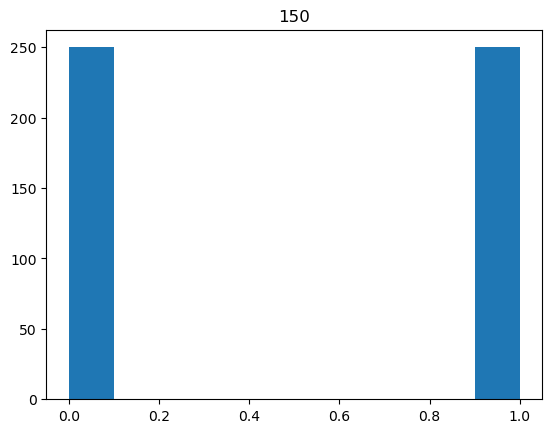

In [384]:
####################### PLOTS HISTOGRAM FOR EACH FEATURE ##########################

# Histogram: you can select 15 columns from your dataset--> this can be adjusted
selected_columns = df.columns[:151]

# Step 3: Create histograms for the selected columns
for column in selected_columns:
    plt.figure()
    df[column].hist(bins=30)  # You can adjust the number of bins as needed
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
#Histogram. This prints all the features in the dataset 
for i in df.columns:
    
    plt.figure()
    plt.title(f'{i}')
    plt.hist(df[i])

# Subset into 15-column data set

In [336]:
# Subsetting to last 15 columns that includes the label
df = df.iloc[:, 135:151]

In [338]:
# Converting the first 5 columns from floats -> integers -> categories
for i in range(0, 5):

    df.iloc[:,i] = df.iloc[:,i].astype(int) # Integer
    df.iloc[:,i] = df.iloc[:,i].astype('category') # Categories
    
# Turn label into categorical label
df.iloc[:,15] = df.iloc[:,15].astype('category')

In [340]:
df.head()

,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150
0,3.0,3.0,4.0,5.0,4.0,5.842840,6.137426,2.839904,5.802785,4.080386,4.411744,3.881008,4.633491,3.973615,5.961780,1.0
1,8.0,8.0,10.0,7.0,11.0,8.884413,8.196232,10.197469,8.193319,8.773931,8.896456,7.737510,7.654125,8.829240,9.621520,0.0
2,5.0,2.0,3.0,5.0,5.0,3.966979,4.417696,4.480391,5.416208,5.533536,4.732919,4.834715,6.747958,6.756940,6.515869,1.0
3,4.0,4.0,5.0,3.0,5.0,5.824560,4.437171,4.095338,5.526112,4.051550,7.120506,4.075997,3.384468,4.238665,4.321148,1.0
4,6.0,5.0,5.0,5.0,4.0,6.024058,4.749562,4.383993,5.503089,5.680233,4.142355,3.837929,5.481257,5.643750,6.038575,1.0


# Subset into Categorical & Numerical

In [439]:
# Creating subset of only CATEGORICAL variables + LABEL
df_categorical = df.select_dtypes(include=['category'])
df_categorical['label'] = df.iloc[:,15]
df_categorical

,135,136,137,138,139,150,label
0,3.0,3.0,4.0,5.0,4.0,1.0,1.0
1,8.0,8.0,10.0,7.0,11.0,0.0,0.0
2,5.0,2.0,3.0,5.0,5.0,1.0,1.0
3,4.0,4.0,5.0,3.0,5.0,1.0,1.0
4,6.0,5.0,5.0,5.0,4.0,1.0,1.0
...,...,...,...,...,...,...,...
495,2.0,5.0,6.0,5.0,6.0,1.0,1.0
496,9.0,7.0,7.0,8.0,9.0,0.0,0.0
497,7.0,7.0,8.0,9.0,8.0,0.0,0.0
498,3.0,6.0,3.0,4.0,4.0,1.0,1.0


In [435]:
# Creating subset of only NUMERICAL variables + LABEL
# NOTE: You need to look up the type of one numerical value to figure out if it was a float or int
df_numerical = df.select_dtypes(include=['float64'])
df_numerical['label'] = df.iloc[:,15]
df_numerical

,140,141,142,143,144,145,146,147,148,149,label
0,5.842840,6.137426,2.839904,5.802785,4.080386,4.411744,3.881008,4.633491,3.973615,5.961780,1.0
1,8.884413,8.196232,10.197469,8.193319,8.773931,8.896456,7.737510,7.654125,8.829240,9.621520,0.0
2,3.966979,4.417696,4.480391,5.416208,5.533536,4.732919,4.834715,6.747958,6.756940,6.515869,1.0
3,5.824560,4.437171,4.095338,5.526112,4.051550,7.120506,4.075997,3.384468,4.238665,4.321148,1.0
4,6.024058,4.749562,4.383993,5.503089,5.680233,4.142355,3.837929,5.481257,5.643750,6.038575,1.0
...,...,...,...,...,...,...,...,...,...,...,...
495,5.417340,4.327204,5.211451,3.624963,5.249778,6.364941,4.729779,5.280159,5.577967,5.549090,1.0
496,8.417036,8.236764,7.390386,9.071667,10.297523,10.343808,9.129393,9.094577,8.450501,9.918957,0.0
497,10.472272,8.949818,10.584447,9.610358,8.900406,10.183136,10.441898,7.987554,9.569769,7.280995,0.0
498,5.532586,3.893261,5.871415,5.197735,5.380752,6.393439,3.973606,3.156872,3.323267,7.262454,1.0


# Visualizations

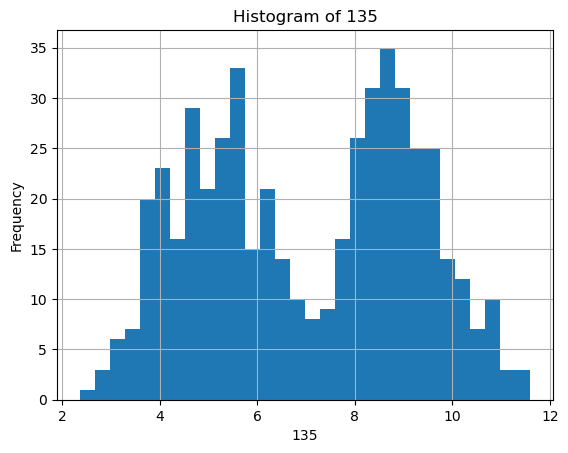

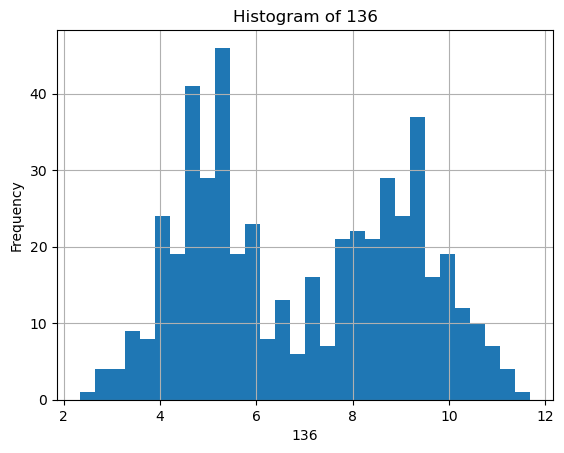

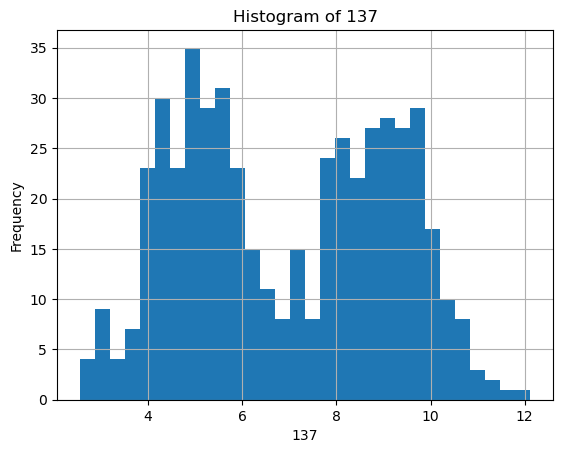

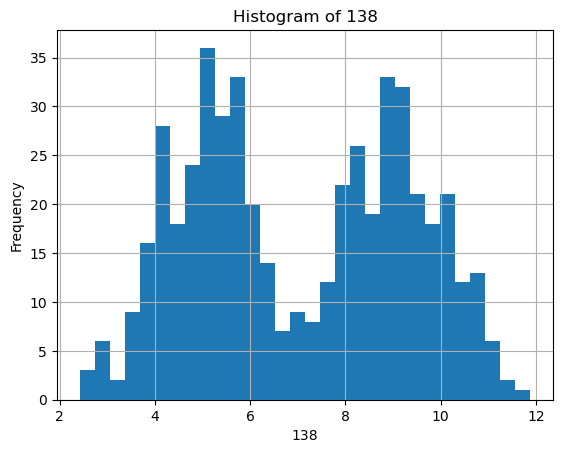

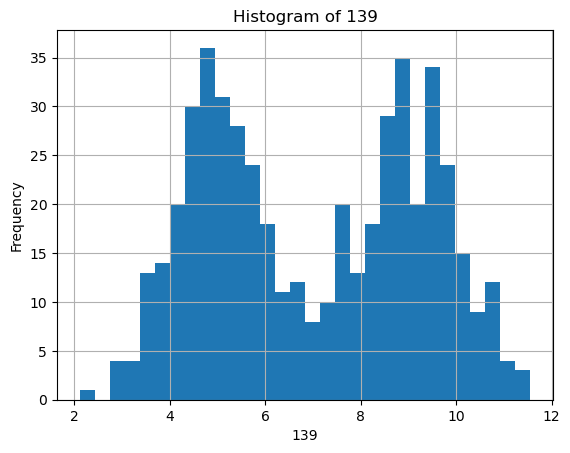

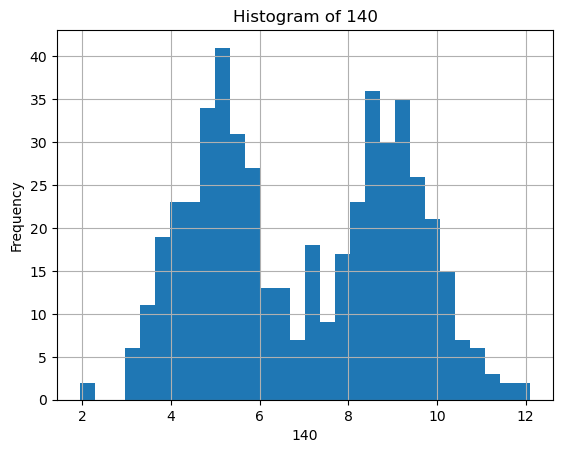

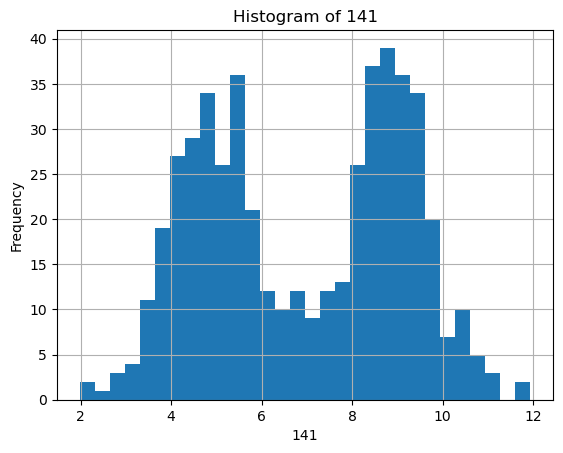

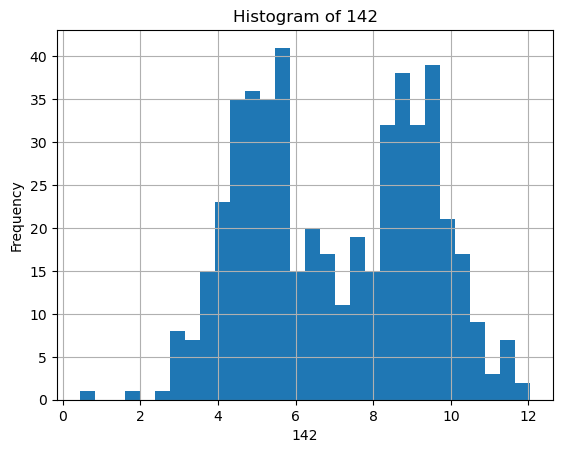

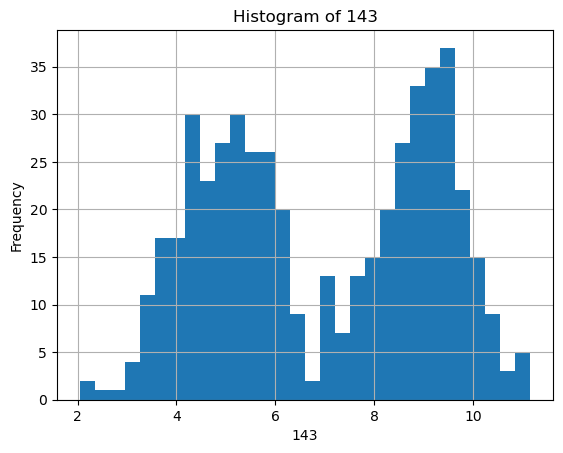

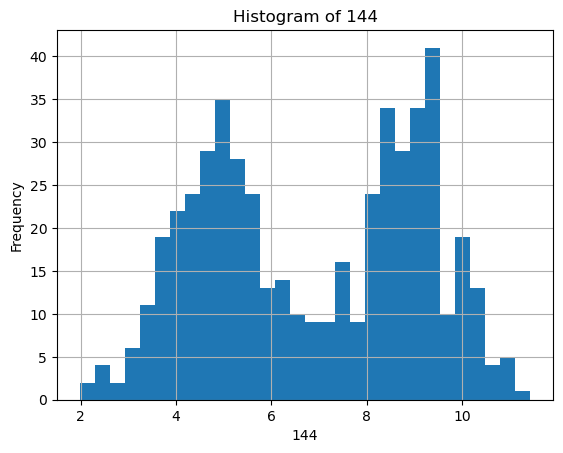

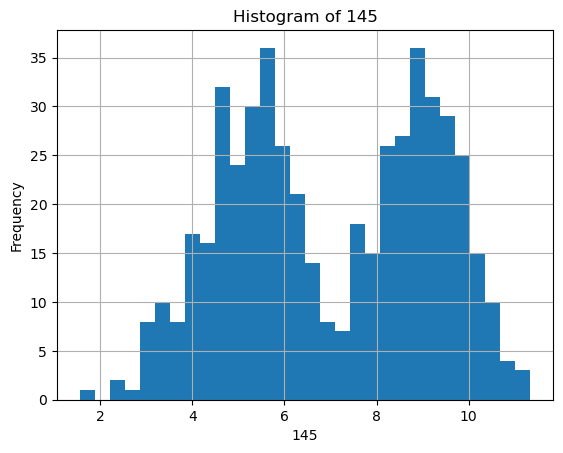

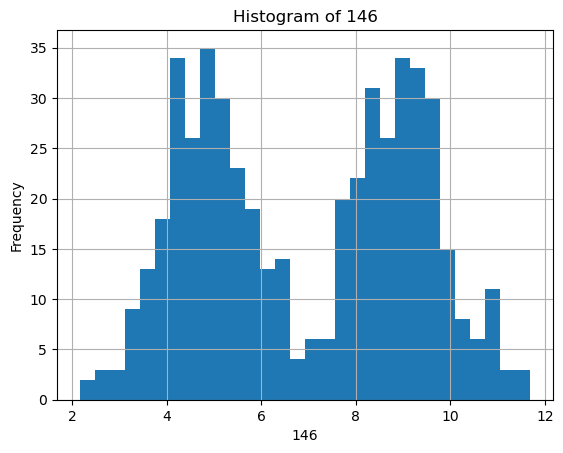

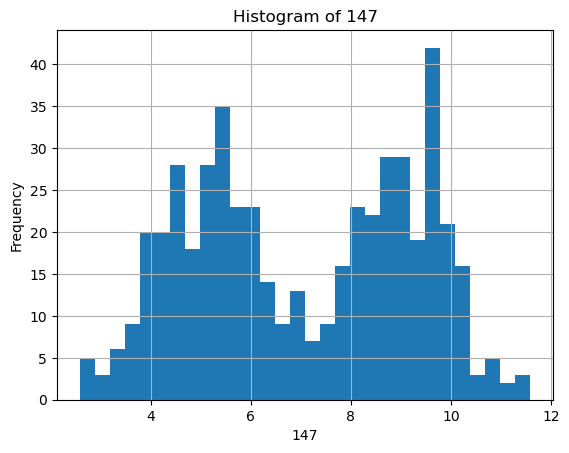

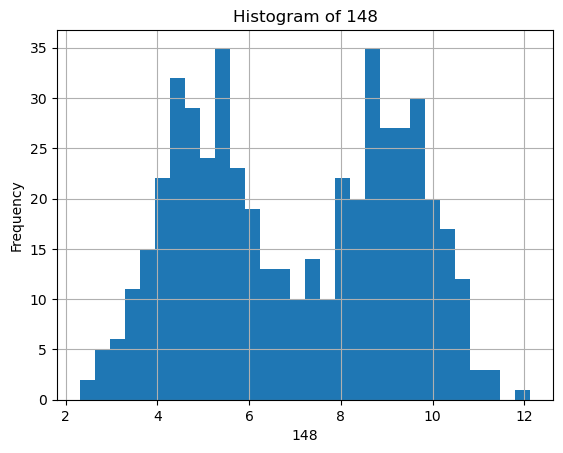

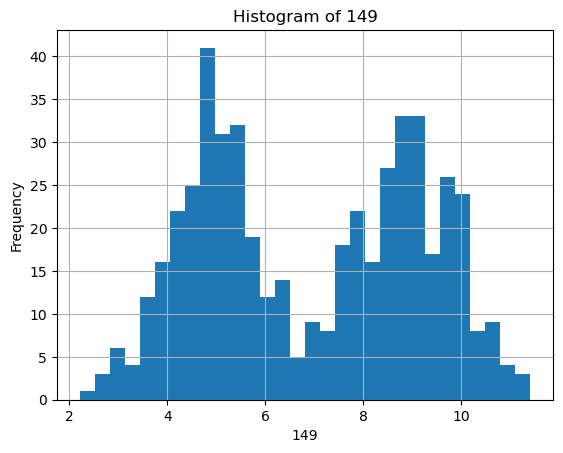

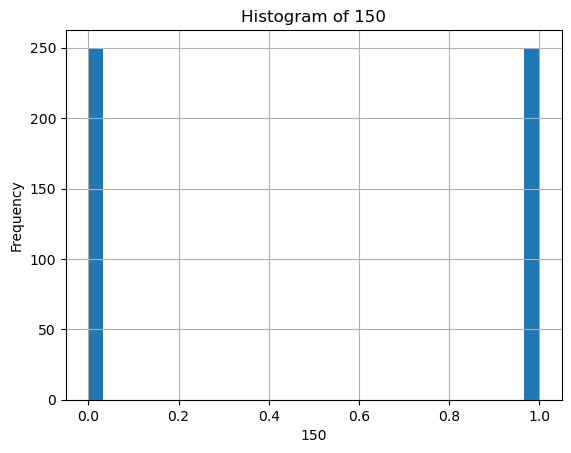

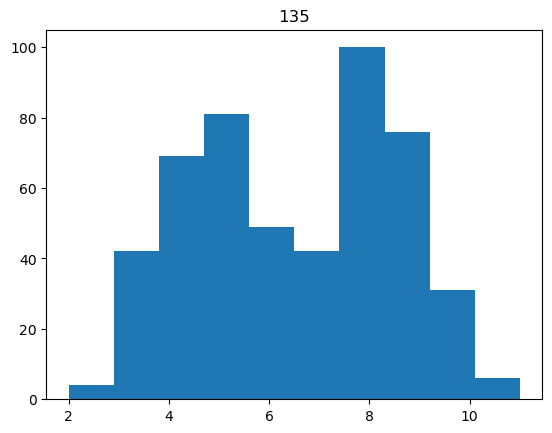

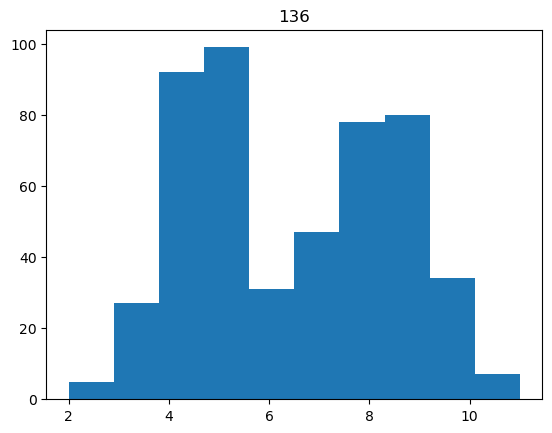

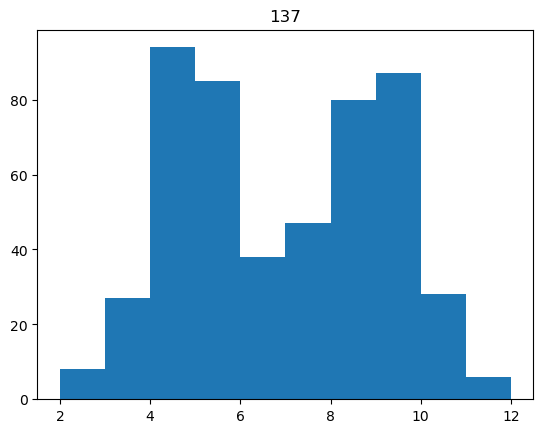

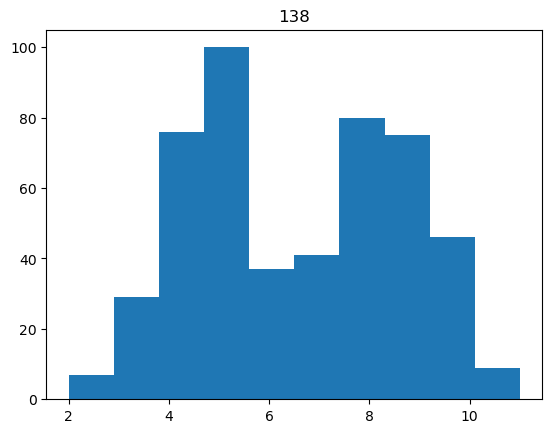

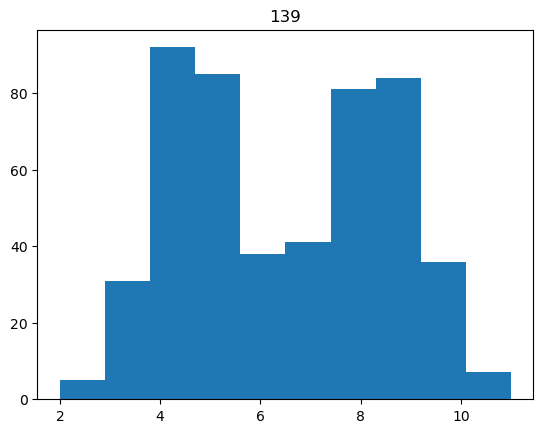

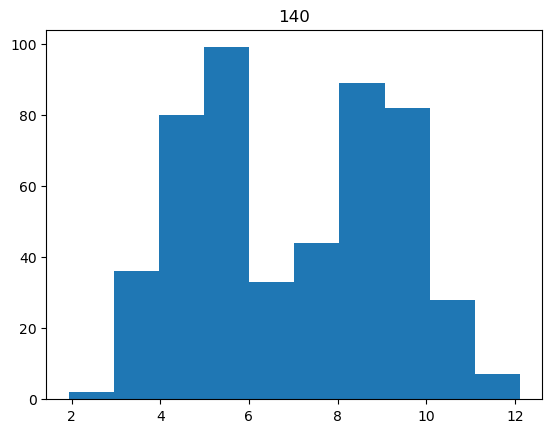

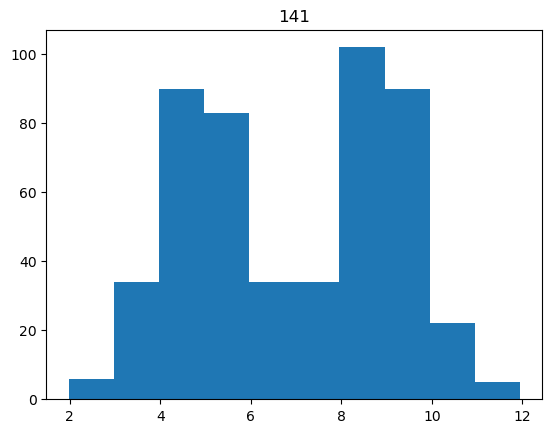

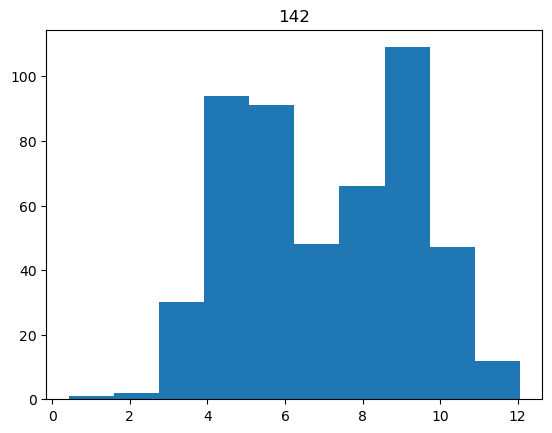

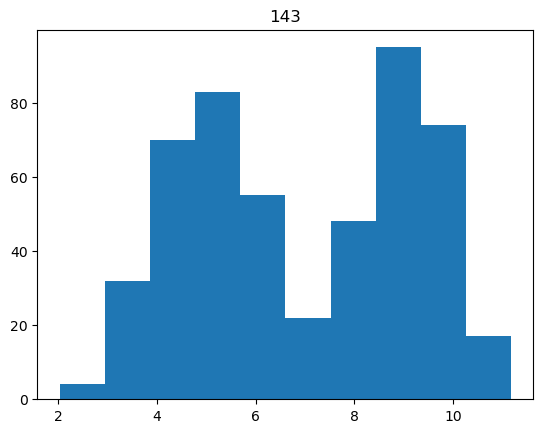

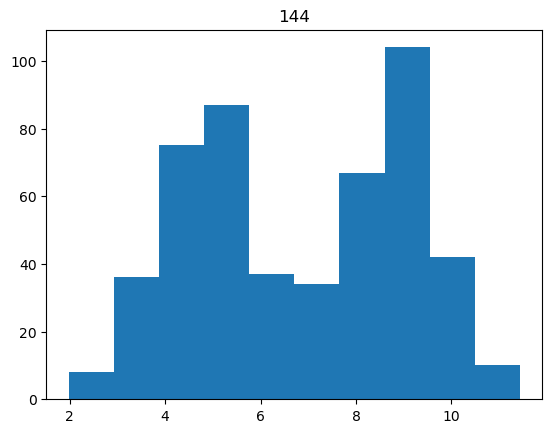

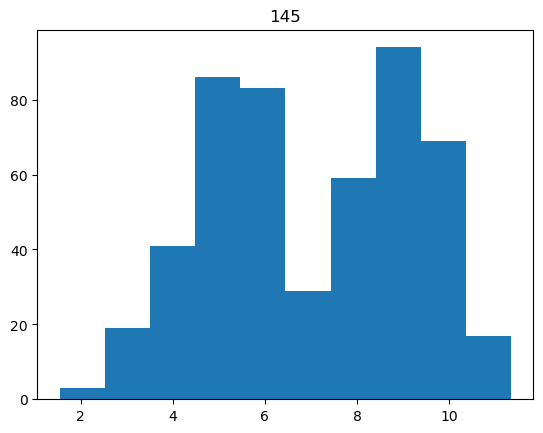

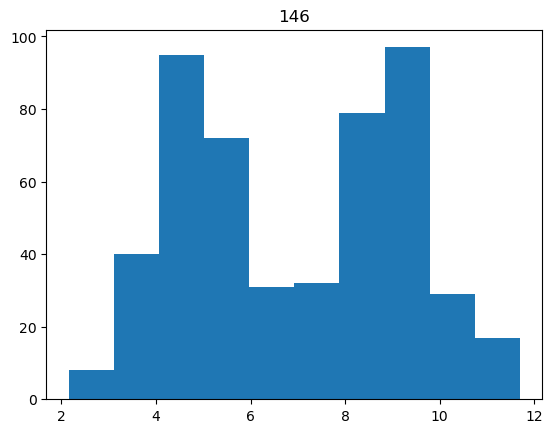

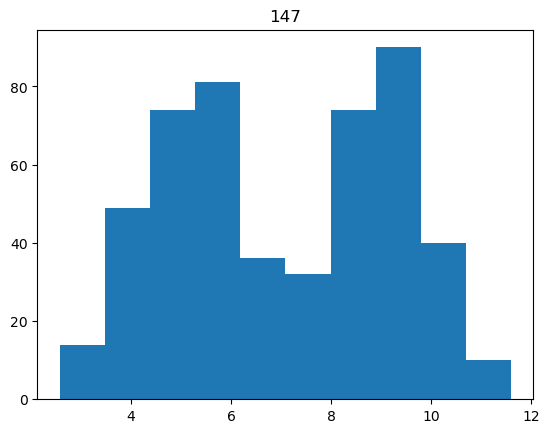

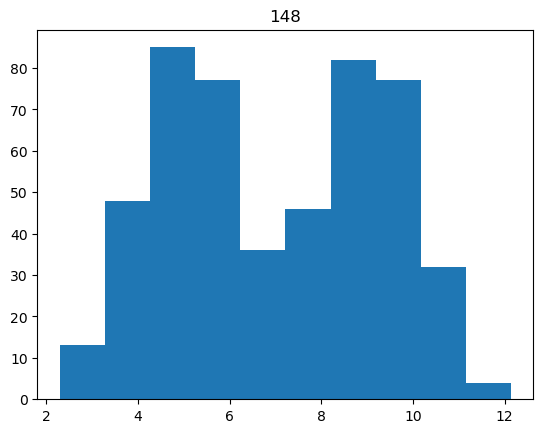

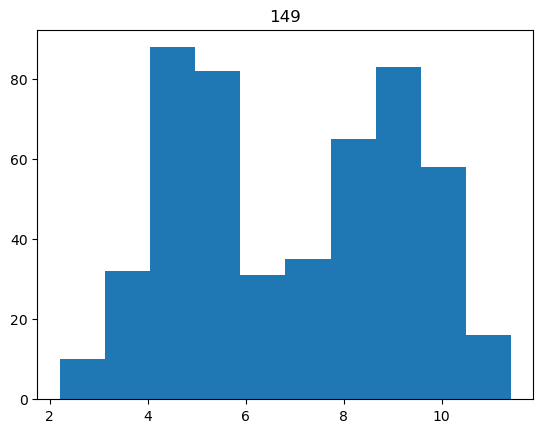

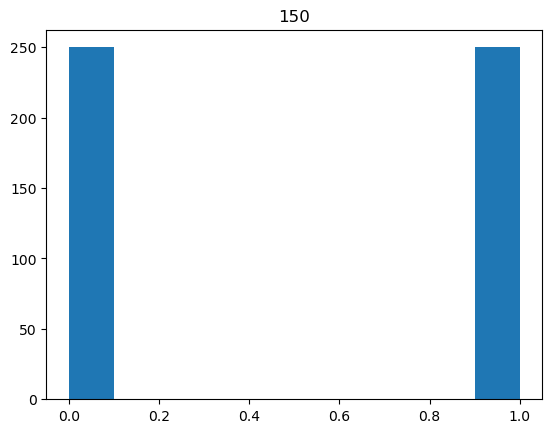

In [412]:
# Histogram: you can select 15 columns from your dataset--> this can be adjusted
selected_columns = df.columns[:151]

# Step 3: Create histograms for the selected columns
for column in selected_columns:
    plt.figure()
    df_table[column].hist(bins=30)  # You can adjust the number of bins as needed
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
#Histogram. This prints all the features in the dataset 
for i in df.columns:
    
    plt.figure()
    plt.title(f'{i}')
    plt.hist(df[i])

# Correlation between columns

In [322]:
# Print the correlation matrix of ENTIRE dataframe
print(df.corr(method='pearson'))

          136       137       138       139       140       141       142  \
136  1.000000  0.795061  0.794505  0.780005  0.789391  0.794461  0.796212   
137  0.795061  1.000000  0.783834  0.785765  0.789168  0.792551  0.781776   
138  0.794505  0.783834  1.000000  0.787186  0.790404  0.786279  0.776846   
139  0.780005  0.785765  0.787186  1.000000  0.782631  0.795996  0.780069   
140  0.789391  0.789168  0.790404  0.782631  1.000000  0.788844  0.777532   
141  0.794461  0.792551  0.786279  0.795996  0.788844  1.000000  0.804697   
142  0.796212  0.781776  0.776846  0.780069  0.777532  0.804697  1.000000   
143  0.794406  0.784250  0.788535  0.793602  0.815275  0.800066  0.796618   
144  0.798174  0.796586  0.788236  0.801627  0.781116  0.800710  0.800753   
145  0.798599  0.781165  0.794121  0.797945  0.796197  0.791705  0.778126   
146  0.793670  0.788507  0.801107  0.790957  0.799820  0.814278  0.801848   
147  0.767394  0.784467  0.792537  0.797558  0.811528  0.806687  0.788621   

In [441]:
# Print the correlation matrix of CATEGORICAL dataframe
print(df_categorical.corr(method='pearson'))

            135       136       137       138       139       150     label
135    1.000000  0.769550  0.764575  0.779921  0.782040 -0.873173 -0.873173
136    0.769550  1.000000  0.795061  0.794505  0.780005 -0.888652 -0.888652
137    0.764575  0.795061  1.000000  0.783834  0.785765 -0.882822 -0.882822
138    0.779921  0.794505  0.783834  1.000000  0.787186 -0.886201 -0.886201
139    0.782040  0.780005  0.785765  0.787186  1.000000 -0.887941 -0.887941
150   -0.873173 -0.888652 -0.882822 -0.886201 -0.887941  1.000000  1.000000
label -0.873173 -0.888652 -0.882822 -0.886201 -0.887941  1.000000  1.000000


In [443]:
# Print the correlation matrix of CATEGORICAL dataframe
print(df_numerical.corr(method='pearson'))

            140       141       142       143       144       145       146  \
140    1.000000  0.793370  0.787052  0.820770  0.789169  0.796696  0.807527   
141    0.793370  1.000000  0.804697  0.800066  0.800710  0.791705  0.814278   
142    0.787052  0.804697  1.000000  0.796618  0.800753  0.778126  0.801848   
143    0.820770  0.800066  0.796618  1.000000  0.798895  0.792801  0.825920   
144    0.789169  0.800710  0.800753  0.798895  1.000000  0.792824  0.817909   
145    0.796696  0.791705  0.778126  0.792801  0.792824  1.000000  0.798749   
146    0.807527  0.814278  0.801848  0.825920  0.817909  0.798749  1.000000   
147    0.819073  0.806687  0.788621  0.808162  0.800736  0.784526  0.808748   
148    0.803515  0.779672  0.786960  0.794706  0.807871  0.779270  0.813189   
149    0.797340  0.789121  0.793432  0.797192  0.803412  0.771235  0.799227   
label -0.895593 -0.896687 -0.885632 -0.898122 -0.898368 -0.885550 -0.903792   

            147       148       149     label  
140

# Chi-squared test

In [445]:
############### CHI-SQUARE TEST FOR LABEL V. ALL FEATURES ########################
# Import relevant libraries 
import scipy.stats as stats

#######################################################################

# Number of features, excluding label
var_count = len(df_categorical.columns)-1

# Empty list
out = []

for i in range(0, var_count):

    # Create contigency table
    crosstab = pd.crosstab(df_categorical.iloc[:, i], df_categorical.iloc[:,-1])

    # Passing contingency table into chi-squared test
    chi, p, dof, exp = stats.chi2_contingency(crosstab)
    print(" ")
    print("Chi-squared:", chi)
    print("p-value:", p)

 
Chi-squared: 454.91931468883854
p-value: 2.5453739343715548e-92
 
Chi-squared: 461.6197666437886
p-value: 9.394948016360973e-94
 
Chi-squared: 453.80067189249723
p-value: 3.2303920926733635e-91
 
Chi-squared: 468.16875411997364
p-value: 3.733534813491476e-95
 
Chi-squared: 456.6700898587933
p-value: 1.0749505310615601e-92
 
Chi-squared: 496.008
p-value: 7.023536136418314e-110


In [447]:
############### CHI-SQUARE TEST FOR ALL FEATURES V. ALL FEATURES ########################

# Number of features, excluding label
var_count = len(df_categorical.columns)-1

for j in range(0, var_count):

    for i in range(0, var_count):
    
        # Create contigency table
        crosstab = pd.crosstab(df_categorical.iloc[:, i], df_categorical.iloc[:,j])
    
        # Passing contingency table into chi-squared test
        chi, p, dof, exp = stats.chi2_contingency(crosstab)
        print("V", i, "V", j)
        print("Chi-squared:", chi)
        print("p-value:", p)
        print(" ")
    

V 0 V 0
Chi-squared: 4500.0
p-value: 0.0
 
V 1 V 0
Chi-squared: 495.74551149057726
p-value: 7.72692691710445e-61
 
V 2 V 0
Chi-squared: 512.216166071961
p-value: 2.5185133425975025e-60
 
V 3 V 0
Chi-squared: 485.1947224692986
p-value: 6.483619578841427e-59
 
V 4 V 0
Chi-squared: 468.48573095174413
p-value: 6.949251791069678e-56
 
V 5 V 0
Chi-squared: 454.9193146888385
p-value: 2.5453739343716267e-92
 
V 0 V 1
Chi-squared: 495.7455114905772
p-value: 7.726926917104455e-61
 
V 1 V 1
Chi-squared: 4500.0
p-value: 0.0
 
V 2 V 1
Chi-squared: 480.2808343644471
p-value: 1.2930695062068195e-54
 
V 3 V 1
Chi-squared: 470.6598561472674
p-value: 2.810976100499463e-56
 
V 4 V 1
Chi-squared: 476.7527931508002
p-value: 2.2148199505682807e-57
 
V 5 V 1
Chi-squared: 461.6197666437886
p-value: 9.394948016360973e-94
 
V 0 V 2
Chi-squared: 512.2161660719609
p-value: 2.5185133425975743e-60
 
V 1 V 2
Chi-squared: 480.28083436444706
p-value: 1.2930695062068559e-54
 
V 2 V 2
Chi-squared: 5000.0
p-value: 0.0
 


In [1]:
from itertools import combinations

data = df_categorical

# Extract variable names
variable_names = list(data.columns)

# Initialize matrices to store chi-squared and p-values
num_variables = len(variable_names)
chi_squared = np.zeros((num_variables, num_variables))
p_values = np.zeros((num_variables, num_variables))

# Compute chi-squared and p-values for each pair of variables
for i, j in combinations(range(num_variables), 2):
    contingency_table = pd.crosstab(data.iloc[:, i], data.iloc[:, j])
    
    # Compute chi-squared and p-values
    chi2 = stats.chi2_contingency(contingency_table)[0]
    p = stats.chi2_contingency(contingency_table)[1]
    
    # Assign results to chi_squared and p_values matrices
    chi_squared[i, j] = chi2
    chi_squared[j, i] = chi2  # Assign to symmetric position in the matrix
    p_values[i, j] = p
    p_values[j, i] = p  # Assign to symmetric position in the matrix

# Create a DataFrame with variable names as index and columns
chi_squared_df = pd.DataFrame(chi_squared, index=variable_names, columns=variable_names)
p_values_df = pd.DataFrame(p_values, index=variable_names, columns=variable_names)

# Printing the matrix-like output with variable names
print("Chi-Squared Values:")
print(chi_squared_df)
print("\nP-Values:")
print(p_values_df)

NameError: name 'df_categorical' is not defined

# Kolmogorov-Smirnov Test

In [471]:
KS_df = df.select_dtypes(include=['float64'])
KS_df

,140,141,142,143,144,145,146,147,148,149
0,5.842840,6.137426,2.839904,5.802785,4.080386,4.411744,3.881008,4.633491,3.973615,5.961780
1,8.884413,8.196232,10.197469,8.193319,8.773931,8.896456,7.737510,7.654125,8.829240,9.621520
2,3.966979,4.417696,4.480391,5.416208,5.533536,4.732919,4.834715,6.747958,6.756940,6.515869
3,5.824560,4.437171,4.095338,5.526112,4.051550,7.120506,4.075997,3.384468,4.238665,4.321148
4,6.024058,4.749562,4.383993,5.503089,5.680233,4.142355,3.837929,5.481257,5.643750,6.038575
...,...,...,...,...,...,...,...,...,...,...
495,5.417340,4.327204,5.211451,3.624963,5.249778,6.364941,4.729779,5.280159,5.577967,5.549090
496,8.417036,8.236764,7.390386,9.071667,10.297523,10.343808,9.129393,9.094577,8.450501,9.918957
497,10.472272,8.949818,10.584447,9.610358,8.900406,10.183136,10.441898,7.987554,9.569769,7.280995
498,5.532586,3.893261,5.871415,5.197735,5.380752,6.393439,3.973606,3.156872,3.323267,7.262454


In [473]:
# Kolmogorov-Smirnov test function
def ks_test(sample):
    # Sort the sample
    sample_sorted = np.sort(sample)
    # Evaluate the empirical CDF (ECDF)
    ecdf = np.arange(1, len(sample_sorted)+1) / len(sample_sorted)
    # Evaluate the theoretical CDF
    cdf = stats.norm.cdf(sample_sorted)
    # Calculate the KS statistic
    ks_stat = np.max(np.abs(ecdf - cdf))
    # Calculate the p-value
    p_value = stats.kstest(sample_sorted, 'norm').pvalue
    return ks_stat, p_value

# Select one feature from the dataset (Example: assuming the first column is sepal_length)
sample = KS_df.iloc[:, 0]  # Change the column index as needed

# Standardize the sample
standardized_sample = standardize(sample)

# Perform the KS test on standardize sample
ks_stat, p_value = ks_test(standardized_sample)


In [475]:
# Print the result
print(f"KS Test Result for {KS_df.columns[0]}: \nks_stat = {ks_stat:.4f}, \np-value = {p_value:.3e}, \nNormal distribution = {p_value > 0.05}")

# This supports or rejects the null hypothesis H0 
# If sample does not come from a normal distribution ---> reject H0
# If sample comes from a normal distribution ---> fail to reject H0
if p_value > 0.05:
    print("Fail to reject H0. Sample comes from the specified distribution")
else:
     print("Reject H0. Sample DOES NOT come from the specified distribution")


KS Test Result for 140: 
ks_stat = 0.1110, 
p-value = 8.111e-06, 
Normal distribution = False
Reject H0. Sample DOES NOT come from the specified distribution


In [479]:
# Data
KS_df = df.select_dtypes(include=['float64'])

# Number of features, excluding label
var_count = len(df_categorical.columns)-1


for i in range(0, var_count):

    # Select one feature from the dataset (Example: assuming the first column is sepal_length)
    sample = KS_df.iloc[:, i]  # Change the column index as needed

    # Standardize the sample
    standardized_sample = standardize(sample)

    # Perform the KS test on standardize sample
    ks_stat, p_value = ks_test(standardized_sample)

    # Print the result
    print(f"KS Test Result for {KS_df.columns[i]}: \nks_stat = {ks_stat:.4f}, \np-value = {p_value:.3e}, \nNormal distribution = {p_value > 0.05}")

    # This supports or rejects the null hypothesis H0 
    # If sample does not come from a normal distribution ---> reject H0
    # If sample comes from a normal distribution ---> fail to reject H0
    if p_value > 0.05:
        print("Fail to reject H0. Sample comes from the specified distribution")
    else:
         print("Reject H0. Sample DOES NOT come from the specified distribution")
    print(" ")


KS Test Result for 140: 
ks_stat = 0.1110, 
p-value = 8.111e-06, 
Normal distribution = False
Reject H0. Sample DOES NOT come from the specified distribution
 
KS Test Result for 141: 
ks_stat = 0.1254, 
p-value = 1.543e-07, 
Normal distribution = False
Reject H0. Sample DOES NOT come from the specified distribution
 
KS Test Result for 142: 
ks_stat = 0.1064, 
p-value = 2.201e-05, 
Normal distribution = False
Reject H0. Sample DOES NOT come from the specified distribution
 
KS Test Result for 143: 
ks_stat = 0.1194, 
p-value = 7.011e-07, 
Normal distribution = False
Reject H0. Sample DOES NOT come from the specified distribution
 
KS Test Result for 144: 
ks_stat = 0.1207, 
p-value = 5.062e-07, 
Normal distribution = False
Reject H0. Sample DOES NOT come from the specified distribution
 
KS Test Result for 145: 
ks_stat = 0.1020, 
p-value = 3.651e-05, 
Normal distribution = False
Reject H0. Sample DOES NOT come from the specified distribution
 
